In [1]:
# Hypothesis testing in Linear Regression 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# 1. Generate synthetic data
np.random.seed(42)
n = 100

X1 = np.random.normal(0, 1, n)          # Predictor 1
X2 = np.random.normal(0, 1, n)          # Predictor 2
noise = np.random.normal(0, 1, n)       # Random error

# True relationship: Y = 3 + 2*X1 + 0*X2 + noise
Y = 3 + 2*X1 + 0*X2 + noise

In [3]:
# 2. Prepare data for regression
X = np.column_stack((X1, X2))
X = sm.add_constant(X)   # add intercept
model = sm.OLS(Y, X).fit()

In [4]:
# 3. Show regression summary (includes hypothesis tests for betas)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     175.3
Date:                Fri, 22 Aug 2025   Prob (F-statistic):           6.19e-33
Time:                        11:39:49   Log-Likelihood:                -147.62
No. Observations:                 100   AIC:                             301.2
Df Residuals:                      97   BIC:                             309.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0886      0.108     28.537      0.0

In [5]:
# 4. Extract p-values for hypothesis testing
p_values = model.pvalues
print("\nP-values for coefficients:")
print(p_values)


P-values for coefficients:
[5.55083025e-49 1.22439863e-33 9.14747577e-01]


In [8]:
# 5. Simple interpretation
alpha = 0.05  # significance level
print("\nHypothesis testing results (alpha = 0.05):")
coef_names = ["const", "x1", "x2"]

for coef, p in zip(coef_names, p_values):
    if p < alpha:
        print(f"Reject H0: {coef} is statistically significant (p = {p:.4f})")
    else:
        print(f"Fail to reject H0: {coef} is NOT statistically significant (p = {p:.4f})")


Hypothesis testing results (alpha = 0.05):
Reject H0: const is statistically significant (p = 0.0000)
Reject H0: x1 is statistically significant (p = 0.0000)
Fail to reject H0: x2 is NOT statistically significant (p = 0.9147)


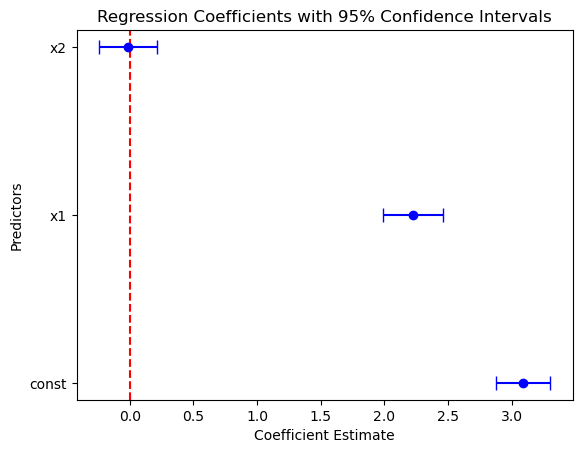

In [12]:
# 6. Visualization: Coefficient estimates with 95% CI
# Get params and confidence intervals
params = model.params
conf_intervals = model.conf_int(alpha=0.05)

# Build names depending on number of coefficients
coef_names = ["const"] + [f"x{i+1}" for i in range(len(params)-1)]

# Extract lower and upper bounds
lower_bounds = conf_intervals[:, 0]
upper_bounds = conf_intervals[:, 1]

# Plot coefficients with error bars
plt.errorbar(params, coef_names,
             xerr=[params - lower_bounds, upper_bounds - params],
             fmt='o', capsize=5, color="blue")

plt.axvline(x=0, color="red", linestyle="--")
plt.title("Regression Coefficients with 95% Confidence Intervals")
plt.xlabel("Coefficient Estimate")
plt.ylabel("Predictors")
plt.show()